## CIFAR-10 サンプル(Keras版)

In [1]:
# Kerasライブラリのインポート

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

In [2]:
# それ以外のライブラリのインポート

!pip install japanize_matplotlib | tail -n 1
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

In [3]:
# 学習データ読み込み

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 分類先クラス数の計算
class_labels_count = len(set(y_train.flatten()))

# One Hot Encoding
from keras.utils import np_utils
y_train_ohe = np_utils.to_categorical(y_train, class_labels_count)
y_test_ohe = np_utils.to_categorical(y_test, class_labels_count)

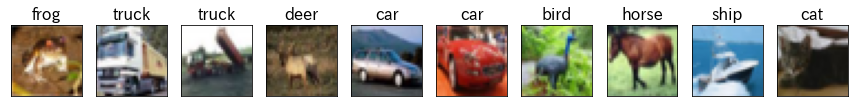

In [4]:
# 最初の10個の表示

plt.figure(figsize=(15, 4))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    image = x_train[i]
    label = y_train[i][0]
    plt.imshow(image)
    ax.set_title(classes[label], fontsize=16)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [5]:
# 学習繰り返し回数
nb_epoch = 20

# 1回の学習で何枚の画像を使うか
batch_size = 128

In [6]:
def cnn_model(x_train, class_labels_count):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3))) 
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(class_labels_count))
    model.add(Activation('softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model


In [7]:
# モデル生成

model = cnn_model(x_train, class_labels_count)

In [8]:
# モデルのサマリー表示

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [9]:
# 学習

history = model.fit(
    x_train, y_train_ohe, batch_size=batch_size, epochs=nb_epoch, verbose=1,
    validation_data=(x_test, y_test_ohe), shuffle=True
)

Epoch 1/20
391/391 [==============================] - 7s 11ms/step - loss: 4.8051 - accuracy: 0.2355 - val_loss: 1.5342 - val_accuracy: 0.4480
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.4853 - accuracy: 0.4612 - val_loss: 1.2996 - val_accuracy: 0.5420
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.3215 - accuracy: 0.5309 - val_loss: 1.1627 - val_accuracy: 0.5996
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.2014 - accuracy: 0.5732 - val_loss: 1.0446 - val_accuracy: 0.6388
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1124 - accuracy: 0.6070 - val_loss: 0.9813 - val_accuracy: 0.6627
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0317 - accuracy: 0.6355 - val_loss: 0.9245 - val_accuracy: 0.6772
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9625 - accuracy: 0.6639 - val_loss: 0.8732 - val_accuracy: 0.7022

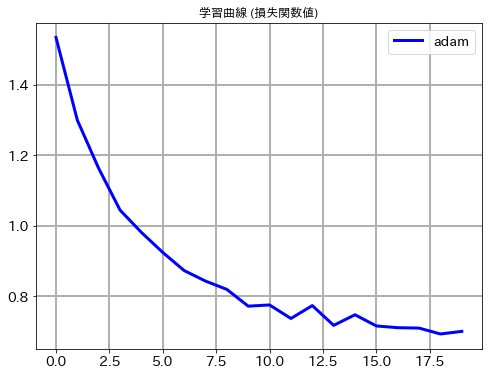

In [10]:
# 学習曲線 (損失関数値)
plt.figure(figsize=(8,6))
plt.plot(history.history['val_loss'],label='adam', lw=3, c='b')
plt.title('学習曲線 (損失関数値)')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

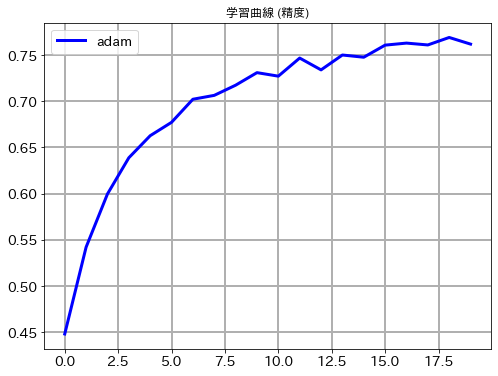

In [11]:
# 学習曲線 (精度)
plt.figure(figsize=(8,6))
plt.plot(history.history['val_accuracy'],label='adam', lw=3, c='b')
plt.title('学習曲線 (精度)')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()